In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.mixture import GaussianMixture
#run kmeans and gaussian and interpret, keep how many clusters i need and change
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Gaukhar-ai/for_my_Thinkful_work/master/capstone/Stock%20Market_1B_predictions/stock_market_data.csv')
df.head()

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,netinccmn,fcfps,PX_TO_BOOK_RATIO,RETURN_ON_ASSET,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET
0,ZYME,8269000.0,3.091,9007000.0,636578000.0,-3.765,-37487000.0,48686718.0,0.170,-35880000.0,...,-162932000.0,-2.154,3.091,-0.358217,-4.339097835,-0.823549,0.181661,-16.467038,6.807722,0.014149
1,ZYME,1877000.0,7.288,6881000.0,368205000.0,-38.489,-36354000.0,43658717.0,0.043,-73752000.0,...,-145437000.0,-2.319,7.288,-0.409374,-39.29248801,-0.922987,0.047655,-19.603277,3.647265,0.018688
2,ZYME,7860000.0,3.146,6755000.0,400037000.0,-3.877,-10880000.0,43445379.0,0.181,-33564000.0,...,-63920000.0,0.004,3.146,-0.197080,-4.270229008,-0.277127,0.200204,6200.000000,6.678431,0.016886
3,ZYME,7882000.0,2.112,7829000.0,414547000.0,-3.689,-13317000.0,32837975.0,0.240,-29432000.0,...,-52196000.0,0.028,2.112,-0.191239,-3.734077645,-0.415356,0.245839,785.714286,8.874183,0.018886
4,ZYME,11925000.0,3.048,8065000.0,238279000.0,-1.144,-21302000.0,32020437.0,0.372,-14553000.0,...,-28993000.0,0.616,3.048,-0.130571,-1.220377358,-0.665162,0.372362,26.266234,6.440652,0.033847


In [3]:
df.shape

(40277, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40277 entries, 0 to 40276
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   40277 non-null  object 
 1   revenue                  39949 non-null  float64
 2   pb                       38433 non-null  float64
 3   debt                     39416 non-null  float64
 4   assets                   39416 non-null  float64
 5   netmargin                38980 non-null  float64
 6   ncfo                     39683 non-null  float64
 7   shareswa                 40072 non-null  float64
 8   sps                      39800 non-null  float64
 9   opinc                    39949 non-null  float64
 10  assetsc                  30302 non-null  float64
 11  liabilitiesc             30265 non-null  float64
 12  price                    38513 non-null  float64
 13  calendardate             40277 non-null  object 
 14  datekey               

In [5]:
df['datekey'].nunique()

584

In [6]:
(df['datekey'] == df['calendardate']).mean() # 83% they match. 


0.8301015467884897

In [7]:
df['calendardate'].unique() #'12/31/2019', '9/30/2019' pick this quarter, merge by Ticker
#add next quarters price. compute the return 

array(['3/31/2020', '12/31/2019', '9/30/2019', '6/30/2019', '3/31/2019',
       '12/31/2018', '9/30/2018', '6/30/2018', '3/31/2018', '12/31/2017',
       '9/30/2017', '6/30/2017', '3/31/2017', '12/31/2016', '12/31/2015',
       '9/30/2016', '6/30/2016', '3/31/2016', '9/30/2015', '6/30/2015',
       '3/31/2015', '6/30/2020'], dtype=object)

In [8]:
#df['calendardate'].unique()

In [9]:
df['calendardate'] = pd.to_datetime(df['calendardate'])
df.head()

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,netinccmn,fcfps,PX_TO_BOOK_RATIO,RETURN_ON_ASSET,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET
0,ZYME,8269000.0,3.091,9007000.0,636578000.0,-3.765,-37487000.0,48686718.0,0.170,-35880000.0,...,-162932000.0,-2.154,3.091,-0.358217,-4.339097835,-0.823549,0.181661,-16.467038,6.807722,0.014149
1,ZYME,1877000.0,7.288,6881000.0,368205000.0,-38.489,-36354000.0,43658717.0,0.043,-73752000.0,...,-145437000.0,-2.319,7.288,-0.409374,-39.29248801,-0.922987,0.047655,-19.603277,3.647265,0.018688
2,ZYME,7860000.0,3.146,6755000.0,400037000.0,-3.877,-10880000.0,43445379.0,0.181,-33564000.0,...,-63920000.0,0.004,3.146,-0.197080,-4.270229008,-0.277127,0.200204,6200.000000,6.678431,0.016886
3,ZYME,7882000.0,2.112,7829000.0,414547000.0,-3.689,-13317000.0,32837975.0,0.240,-29432000.0,...,-52196000.0,0.028,2.112,-0.191239,-3.734077645,-0.415356,0.245839,785.714286,8.874183,0.018886
4,ZYME,11925000.0,3.048,8065000.0,238279000.0,-1.144,-21302000.0,32020437.0,0.372,-14553000.0,...,-28993000.0,0.616,3.048,-0.130571,-1.220377358,-0.665162,0.372362,26.266234,6.440652,0.033847


In [10]:
df['calendardate']

0       2020-03-31
1       2019-12-31
2       2019-09-30
3       2019-06-30
4       2019-03-31
           ...    
40272   2016-03-31
40273   2015-12-31
40274   2015-09-30
40275   2015-06-30
40276   2015-03-31
Name: calendardate, Length: 40277, dtype: datetime64[ns]

In [11]:
df = df[df['calendardate'].between('2019-10-01', '2020-01-01')]
df.head()

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,netinccmn,fcfps,PX_TO_BOOK_RATIO,RETURN_ON_ASSET,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET
1,ZYME,1.877000e+06,7.288,6.881000e+06,3.682050e+08,-38.489,-36354000.0,43658717.0,0.043,-73752000.0,...,-1.454370e+08,-2.319,7.288,-0.409374,-39.29248801,-0.922987,0.047655,-19.603277,3.647265,0.018688
16,ZUO,7.039300e+07,10.140,7.858800e+07,4.022270e+08,-0.337,4009000.0,113180000.0,0.622,-24449000.0,...,-8.339400e+07,-0.225,10.140,-0.243414,-0.347321467,0.035415,0.621846,-65.555556,1.454003,0.195382
30,ZTS,1.674000e+09,23.279,6.611000e+09,1.154500e+10,0.229,582000000.0,476412000.0,3.514,493000000.0,...,1.500000e+09,2.792,23.279,0.134270,0.294504182,1.221921,3.514597,47.403295,1.672204,0.572629
51,ZS,1.012680e+08,22.487,3.444200e+07,6.764250e+08,-0.288,5431000.0,128408000.0,0.789,-30280000.0,...,-6.374200e+07,0.153,22.487,-0.103884,-0.299008571,0.042444,0.791419,366.601307,1.579705,0.050918
65,ZNGA,4.044630e+08,2.931,7.165100e+08,3.660614e+09,-0.009,94049000.0,947733000.0,0.427,4332000.0,...,4.192500e+07,0.873,2.931,0.012826,0.010710498,0.099426,0.427586,7.010309,1.933891,0.195735


In [12]:
df['OPER_MARGIN'] = pd.to_numeric(df['OPER_MARGIN'],errors='coerce') #errors = 'coerse' - converts to NA


In [13]:
df[df['ticker'].isin(['AMD', 'BA', 'GE', 'HTZ', 'AAL', 'NCLH', 'JILL', 'INTEQ'])] #can drop quick_ratio or drop HTZ, GE

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,netinccmn,fcfps,PX_TO_BOOK_RATIO,RETURN_ON_ASSET,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET
15741,NCLH,1.480618e+09,1.907,6.801693e+09,1.668460e+10,0.082,3.418510e+08,2.128776e+08,6.955,1.993760e+08,...,9.302280e+08,0.863,1.907,0.057823,0.134657,1.606763,6.959180,67.682503,0.091504,0.407663
22792,HTZ,2.325000e+09,1.265,1.893700e+10,2.462700e+10,-0.051,6.670000e+08,1.170000e+08,19.872,8.900000e+07,...,-5.800000e+07,-13.034,1.265,-0.002307,0.038280,4.693162,16.359223,-1.208378,NaN,0.768953
25128,GE,1.573700e+10,3.442,9.088200e+10,2.660480e+11,0.034,6.739000e+09,8.733549e+09,1.802,2.186000e+09,...,-5.439000e+09,0.732,3.442,-0.018816,0.138908,0.771622,1.801902,15.245902,NaN,0.341600
36147,BA,1.791100e+10,-21.276,2.730200e+10,1.336250e+11,-0.056,-2.220000e+09,5.627912e+08,31.825,-2.599000e+09,...,-6.360000e+08,-7.011,-21.276,-0.004962,-0.145106,-3.944624,31.825300,-46.464128,0.253175,0.204318
38187,AMD,2.127000e+09,18.191,6.850000e+08,6.028000e+09,0.080,4.420000e+08,1.139000e+09,1.867,3.480000e+08,...,3.410000e+08,0.253,18.191,0.063995,0.163611,0.396901,1.909974,182.529644,1.425180,0.113636
40217,AAL,1.131300e+10,-106.470,3.344400e+10,5.999500e+10,0.037,6.000000e+08,4.380580e+08,25.825,7.290000e+08,...,1.686000e+09,-0.911,-106.470,0.027648,0.064439,1.369682,25.825349,-31.481888,0.313145,0.557446


In [14]:
df = df.replace([np.inf, -np.inf], np.nan)


In [15]:

df = df.dropna()

In [16]:
df.info() #check for infinity how many rows where dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1493 entries, 1 to 40257
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ticker                   1493 non-null   object        
 1   revenue                  1493 non-null   float64       
 2   pb                       1493 non-null   float64       
 3   debt                     1493 non-null   float64       
 4   assets                   1493 non-null   float64       
 5   netmargin                1493 non-null   float64       
 6   ncfo                     1493 non-null   float64       
 7   shareswa                 1493 non-null   float64       
 8   sps                      1493 non-null   float64       
 9   opinc                    1493 non-null   float64       
 10  assetsc                  1493 non-null   float64       
 11  liabilitiesc             1493 non-null   float64       
 12  price                    1493 non

In [17]:
df[df['ticker'].isin(['AMD', 'BA', 'GE', 'HTZ', 'AAL', 'NCLH', 'JILL', 'INTEQ'])]

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,netinccmn,fcfps,PX_TO_BOOK_RATIO,RETURN_ON_ASSET,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET
15741,NCLH,1.480618e+09,1.907,6.801693e+09,1.668460e+10,0.082,3.418510e+08,2.128776e+08,6.955,1.993760e+08,...,9.302280e+08,0.863,1.907,0.057823,0.134657,1.606763,6.959180,67.682503,0.091504,0.407663
36147,BA,1.791100e+10,-21.276,2.730200e+10,1.336250e+11,-0.056,-2.220000e+09,5.627912e+08,31.825,-2.599000e+09,...,-6.360000e+08,-7.011,-21.276,-0.004962,-0.145106,-3.944624,31.825300,-46.464128,0.253175,0.204318
38187,AMD,2.127000e+09,18.191,6.850000e+08,6.028000e+09,0.080,4.420000e+08,1.139000e+09,1.867,3.480000e+08,...,3.410000e+08,0.253,18.191,0.063995,0.163611,0.396901,1.909974,182.529644,1.425180,0.113636
40217,AAL,1.131300e+10,-106.470,3.344400e+10,5.999500e+10,0.037,6.000000e+08,4.380580e+08,25.825,7.290000e+08,...,1.686000e+09,-0.911,-106.470,0.027648,0.064439,1.369682,25.825349,-31.481888,0.313145,0.557446


In [18]:
#df['calendardate']
df.head()

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,netinccmn,fcfps,PX_TO_BOOK_RATIO,RETURN_ON_ASSET,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET
1,ZYME,1.877000e+06,7.288,6.881000e+06,3.682050e+08,-38.489,-36354000.0,43658717.0,0.043,-73752000.0,...,-1.454370e+08,-2.319,7.288,-0.409374,-39.292488,-0.922987,0.047655,-19.603277,3.647265,0.018688
16,ZUO,7.039300e+07,10.140,7.858800e+07,4.022270e+08,-0.337,4009000.0,113180000.0,0.622,-24449000.0,...,-8.339400e+07,-0.225,10.140,-0.243414,-0.347321,0.035415,0.621846,-65.555556,1.454003,0.195382
30,ZTS,1.674000e+09,23.279,6.611000e+09,1.154500e+10,0.229,582000000.0,476412000.0,3.514,493000000.0,...,1.500000e+09,2.792,23.279,0.134270,0.294504,1.221921,3.514597,47.403295,1.672204,0.572629
51,ZS,1.012680e+08,22.487,3.444200e+07,6.764250e+08,-0.288,5431000.0,128408000.0,0.789,-30280000.0,...,-6.374200e+07,0.153,22.487,-0.103884,-0.299009,0.042444,0.791419,366.601307,1.579705,0.050918
65,ZNGA,4.044630e+08,2.931,7.165100e+08,3.660614e+09,-0.009,94049000.0,947733000.0,0.427,4332000.0,...,4.192500e+07,0.873,2.931,0.012826,0.010710,0.099426,0.427586,7.010309,1.933891,0.195735


In [19]:
df_copy = df.copy() #can cluster labels in df copy for cluster analyses.

drop_cols = ['datekey', 'calendardate', 'TOT_DEBT_TO_TOTAL_ASSET', 'PX_FREE_CASH_FLOW', 'REVENUE_PER_SHARE', 'CASH_FLOW_PER_SHARE',
            'OPER_MARGIN', 'RETURN_ON_ASSET', 'PX_TO_BOOK_RATIO', 'ticker']
df.drop(columns = drop_cols, inplace=True)


In [20]:
df.isna().sum()

ticker                     0
revenue                    0
pb                         0
debt                       0
assets                     0
netmargin                  0
ncfo                       0
shareswa                   0
sps                        0
opinc                      0
assetsc                    0
liabilitiesc               0
price                      0
calendardate               0
datekey                    0
sharesbas                  0
equity                     0
receivables                0
investmentsc               0
cashneq                    0
assetsavg                  0
netinccmn                  0
fcfps                      0
PX_TO_BOOK_RATIO           0
RETURN_ON_ASSET            0
OPER_MARGIN                0
CASH_FLOW_PER_SHARE        0
REVENUE_PER_SHARE          0
PX_FREE_CASH_FLOW          0
quick_ratio                0
TOT_DEBT_TO_TOTAL_ASSET    0
dtype: int64

In [21]:
keep_cols = ['TOT_DEBT_TO_TOTAL_ASSET', 'PX_FREE_CASH_FLOW', 'REVENUE_PER_SHARE', 'CASH_FLOW_PER_SHARE',
            'OPER_MARGIN', 'RETURN_ON_ASSET', 'PX_TO_BOOK_RATIO', 'quick_ratio', 'equity', 'netmargin']
df=df[keep_cols]
df.head()

,TOT_DEBT_TO_TOTAL_ASSET,PX_FREE_CASH_FLOW,REVENUE_PER_SHARE,CASH_FLOW_PER_SHARE,OPER_MARGIN,RETURN_ON_ASSET,PX_TO_BOOK_RATIO,quick_ratio,equity,netmargin
1,0.018688,-19.603277,0.047655,-0.922987,-39.292488,-0.409374,7.288,3.647265,2.456810e+08,-38.489
16,0.195382,-65.555556,0.621846,0.035415,-0.347321,-0.243414,10.140,1.454003,1.646590e+08,-0.337
30,0.572629,47.403295,3.514597,1.221921,0.294504,0.134270,23.279,1.672204,2.708000e+09,0.229
51,0.050918,366.601307,0.791419,0.042444,-0.299009,-0.103884,22.487,1.579705,3.191640e+08,-0.288
65,0.195735,7.010309,0.427586,0.099426,0.010710,0.012826,2.931,1.933891,1.975430e+09,-0.009


In [22]:
df.head()


,TOT_DEBT_TO_TOTAL_ASSET,PX_FREE_CASH_FLOW,REVENUE_PER_SHARE,CASH_FLOW_PER_SHARE,OPER_MARGIN,RETURN_ON_ASSET,PX_TO_BOOK_RATIO,quick_ratio,equity,netmargin
1,0.018688,-19.603277,0.047655,-0.922987,-39.292488,-0.409374,7.288,3.647265,2.456810e+08,-38.489
16,0.195382,-65.555556,0.621846,0.035415,-0.347321,-0.243414,10.140,1.454003,1.646590e+08,-0.337
30,0.572629,47.403295,3.514597,1.221921,0.294504,0.134270,23.279,1.672204,2.708000e+09,0.229
51,0.050918,366.601307,0.791419,0.042444,-0.299009,-0.103884,22.487,1.579705,3.191640e+08,-0.288
65,0.195735,7.010309,0.427586,0.099426,0.010710,0.012826,2.931,1.933891,1.975430e+09,-0.009


In [23]:
#find out what's the fastest way to find upper case and drop them.

In [24]:
#highly correlated cols fix with deleting one of them , might be one info in two cols. 

In [25]:
df.corr()

,TOT_DEBT_TO_TOTAL_ASSET,PX_FREE_CASH_FLOW,REVENUE_PER_SHARE,CASH_FLOW_PER_SHARE,OPER_MARGIN,RETURN_ON_ASSET,PX_TO_BOOK_RATIO,quick_ratio,equity,netmargin
TOT_DEBT_TO_TOTAL_ASSET,1.000000,-0.009748,0.005964,0.021061,0.069597,0.094259,-0.045669,-0.169095,0.004443,0.066201
PX_FREE_CASH_FLOW,-0.009748,1.000000,-0.004659,-0.004172,0.006953,0.051876,0.011290,0.024979,-0.002127,0.006396
REVENUE_PER_SHARE,0.005964,-0.004659,1.000000,0.892506,0.011968,0.035092,-0.003294,-0.037426,0.815309,0.010660
CASH_FLOW_PER_SHARE,0.021061,-0.004172,0.892506,1.000000,0.021760,0.094722,-0.006566,-0.053225,0.889748,0.019044
OPER_MARGIN,0.069597,0.006953,0.011968,0.021760,1.000000,0.285012,-0.006289,-0.129486,0.002986,0.900705
RETURN_ON_ASSET,0.094259,0.051876,0.035092,0.094722,0.285012,1.000000,-0.017569,-0.133204,0.007883,0.258953
PX_TO_BOOK_RATIO,-0.045669,0.011290,-0.003294,-0.006566,-0.006289,-0.017569,1.000000,0.005273,-0.001863,-0.005069
quick_ratio,-0.169095,0.024979,-0.037426,-0.053225,-0.129486,-0.133204,0.005273,1.000000,-0.007829,-0.182241
equity,0.004443,-0.002127,0.815309,0.889748,0.002986,0.007883,-0.001863,-0.007829,1.000000,0.002667
netmargin,0.066201,0.006396,0.010660,0.019044,0.900705,0.258953,-0.005069,-0.182241,0.002667,1.000000


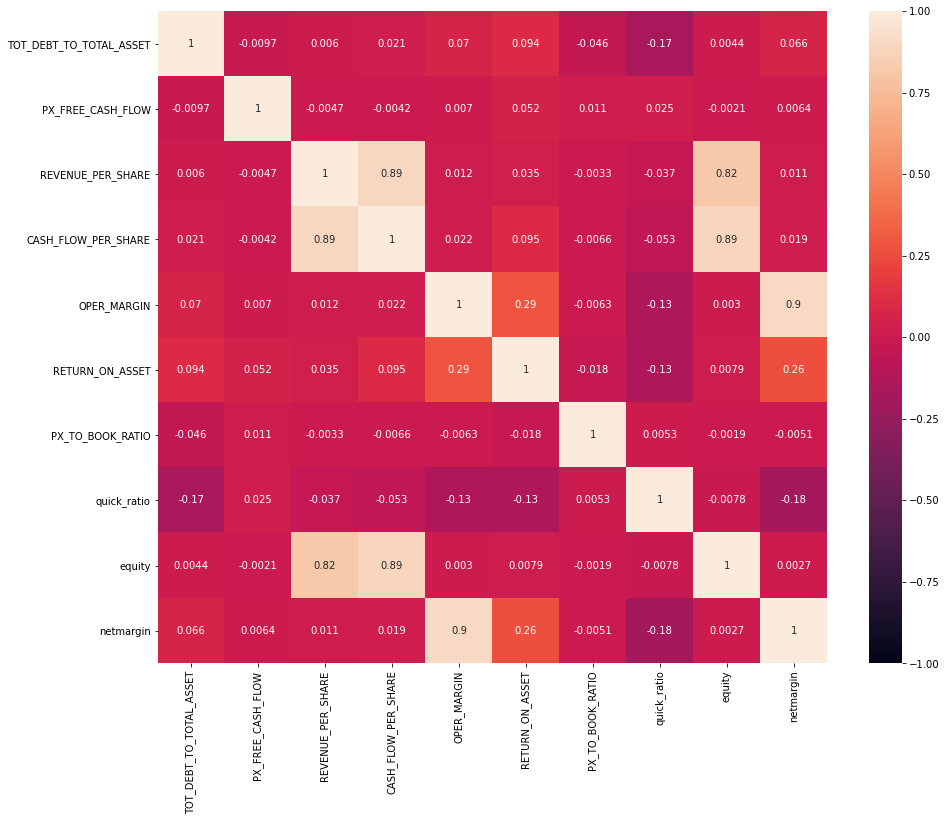

In [26]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [27]:
#>0.5 - higly corr
#< - 0.5 - highly reversely corr

In [28]:
 #new = df.drop(['A', 'B'], axis = 1) other way of saving it to a new var

In [29]:
drop_cols = ['equity', 'REVENUE_PER_SHARE']
df.drop(drop_cols, axis = 1, inplace=True)
df.head()

,TOT_DEBT_TO_TOTAL_ASSET,PX_FREE_CASH_FLOW,CASH_FLOW_PER_SHARE,OPER_MARGIN,RETURN_ON_ASSET,PX_TO_BOOK_RATIO,quick_ratio,netmargin
1,0.018688,-19.603277,-0.922987,-39.292488,-0.409374,7.288,3.647265,-38.489
16,0.195382,-65.555556,0.035415,-0.347321,-0.243414,10.140,1.454003,-0.337
30,0.572629,47.403295,1.221921,0.294504,0.134270,23.279,1.672204,0.229
51,0.050918,366.601307,0.042444,-0.299009,-0.103884,22.487,1.579705,-0.288
65,0.195735,7.010309,0.099426,0.010710,0.012826,2.931,1.933891,-0.009


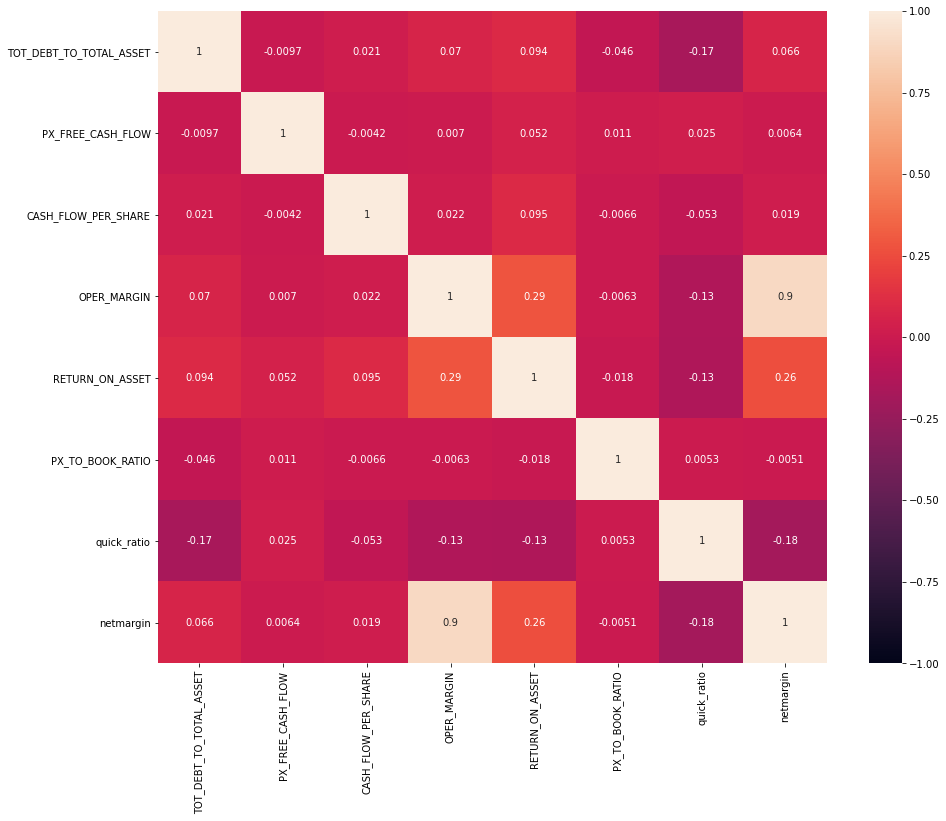

In [30]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [31]:
df.isin

<bound method DataFrame.isin of        TOT_DEBT_TO_TOTAL_ASSET  PX_FREE_CASH_FLOW  CASH_FLOW_PER_SHARE  \
1                     0.018688         -19.603277            -0.922987   
16                    0.195382         -65.555556             0.035415   
30                    0.572629          47.403295             1.221921   
51                    0.050918         366.601307             0.042444   
65                    0.195735           7.010309             0.099426   
...                        ...                ...                  ...   
40154                 0.245764          18.533474             2.286520   
40175                 0.000000          42.303082             0.524823   
40217                 0.557446         -31.481888             1.369682   
40238                 0.123026          13.004837             1.411844   
40257                 0.259131          42.732919            -0.190210   

       OPER_MARGIN  RETURN_ON_ASSET  PX_TO_BOOK_RATIO  quick_ratio  netmargin  

In [39]:

scaler = StandardScaler()
X_std = scaler.fit_transform(df)

In [51]:
kmeans_cluster = KMeans(n_clusters = 3, random_state=55)
kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)
print(y_pred)

[2 2 0 ... 0 0 0]


In [52]:
set(y_pred) #no repeated list = set

{0, 1, 2}

In [74]:
pca = PCA(n_components=2).fit_transform(X_std) #2 dimensions

plt.figure(figsize=(13, 12))
colours = 'rbg' #red, blue, green
#for i in range(pca.shape[0]): #number of rows = 0, 1 = number of cols
for i in range(200): #500 samples only, cuz of the lack of memory
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
            color=colours[y_pred[i]], #i - for loop, number of samples
            fontdict={'weight': 'bold', 'size': 30})
    
plt.xticks([]) #no need, cuz don't have x and y coordinates
plt.xticks([])
plt.axis('off') #axis = plot, no need it
plt.show()

MemoryError: In RendererAgg: Out of memory

<Figure size 936x864 with 1 Axes>

In [54]:
print(pca) #only have 2 features

[[ 1.88549312  1.51291649]
 [ 0.59344972  0.71259314]
 [-0.50375649 -0.66544933]
 ...
 [-0.37931054 -1.23205185]
 [ 0.16849616  0.50312734]
 [-0.22539677  0.136557  ]]


In [ ]:
best = RETURN_ON_ASSET.iloc[-1].sort_values(ascending=False).head()
worst = RETURN_ON_ASSET.iloc[-1].sort_values().head()

print('Best Performing stocks')
names = pd.DataFrame({'name': [get_name(symbol) for symbol in best.index.tolist()]}, index=best.index)
best = pd.DataFrame((best, names))

In [ ]:
df.info()

In [ ]:
df['OPER_MARGIN'].unique()

In [ ]:
#df['OPER_MARGIN'] = df['OPER_MARGIN'].str.replace('\', '').astype(int)

In [ ]:
#df['OPER_MARGIN'] = float('OPER_MARGIN')

In [ ]:
#float("OPER_MARGIN")

In [ ]:
df.['OPER_MARGIN']['6']

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled, columns=df.columns, index = df.index)
df_scaled.head()

In [ ]:
#opinc = operating income


In [ ]:
#scaler = StandardScaler() #to make the mean 0 and std = 1
scaler = MinMaxScaler() #max - 1 min = 0
scaled = scaler.fit_transform(df)



In [ ]:
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

In [ ]:
#standardscale

In [ ]:
#look at sigma and check, whaterver has the highest = keep it. std()
#sector to keep. binary doesnt need corr. 

In [ ]:
scaled_df.std()


In [ ]:
df['revenue'].std()

how to convert tickers to numbers?

# Standarizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
#scaled_df = scale(df)

In [ ]:
#take one quarter of the data = 2000 samples, ticker can drop when doing cluster, 
clean, no corr
standard scaler
cluster

In [ ]:
Oper_MARGIN check is it has nAS, upper case cols
work with row numbers, drop the upper case. 


In [ ]:
#try 100 samples first then all

In [ ]:
scaler = StandardScaler()
df = scaler.fit_transform(all_data)

In [ ]:
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
